In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

# Практическое задание 6
## Вариант 4
## Задание 1 

*Максимальная оценка задания: **3** балла*

Дан набор точек **S**:

| *x<sub>i</sub>* | *a<sub>1</sub>* | *a<sub>2</sub>* | *a<sub>3</sub>* | Class |
| ---- | ---- | ---- | ---- | ---- |
|*x<sub>0</sub>*|G|E|13.9|N|
|*x<sub>1</sub>*|G|X|9.7 |Y|
|*x<sub>2</sub>*|G|E|6.9 |Y|
|*x<sub>3</sub>*|V|X|10.1|N|
|*x<sub>4</sub>*|G|X|7.1 |Y|
|*x<sub>5</sub>*|V|E|12.5|N|
|*x<sub>6</sub>*|V|W|6.4 |Y|
|*x<sub>7</sub>*|G|W|5.4 |Y|
|*x<sub>8</sub>*|V|W|11.7|N|
|*x<sub>9</sub>*|V|X|11.8|N|

1.1 *Самостоятельно* реализуйте алгоритм **NaiveBayes** (*наивный классификатор Байеса*) для **числовых** и **категориальных** признаков.

Необходимо реализовать функцию обучения классификатора на исходных данных, результат которой позволит в дальнейшем производить классификацию точек.

Заметьте, что в исходных данных атрибуты *a<sub>1</sub>* и *a<sub>2</sub>* являются категориальными признаками, а *a<sub>3</sub>* - числовым (непрерывным) признаком.

Также реализуйте функцию определения класса точки и вероятностей ее принадлежности к классам. На вход функции подается результат обучения NaiveBayes и точка в пространстве исходных данных.

Воспользовавшись реализованными функциями, обучите классификатор и определите классы и вероятности точек:

**(G,X,10.5),
(V,X,11.7),
(V,X,7.5)**.

In [2]:
# Функция обучения данных
# Принимает параметры:
# data - данные для обучения
# markup - разметка (в нашем случае 2 класса)
# return:
# list() для p_c - вероятность для классов
# list() для u_c - мат. ожидание для классов
# list() для variance - дисперсия классов
# list(dict{}) для f_categories - вероятность для каждого признака относительно категории и класса
def naive_bayes(data,markup):
    N = len(data)
    p_c = []
    u_c = []
    variance = []
    f_categories = []
    temp_set = []
    for i in range(2): # предобработка относительно признаков
        temp_set.append(set([val[0][i] for val in data]))
    for ind_class,class_mark in enumerate(markup): # для 2 классов 
        temp_dict = {}
        numbers = np.array([j[0][2] for j in data if j[1] == class_mark])
        len_classes_mark = len(numbers) # n_i
        p_c.append(len_classes_mark / N) # вероятность класса
        u_c.append(1/len_classes_mark * sum(numbers)) 
        Z_i = numbers - u_c[ind_class]
        variance.append(1 / len_classes_mark * np.dot(Z_i.T, Z_i))
        for i in range(2):
            kat_i = [pl[0][i] for pl in data if pl[1] == class_mark]
            for key in temp_set[i]:
                temp_dict[key] = (kat_i.count(key)+1)/(len_classes_mark+len(temp_set[i])) #тут делим на u_c
                
        f_categories.append(temp_dict)
    return p_c, u_c, variance,f_categories


# Функция проверки принадлежности точки к ранее обученой модели
# Принимает параметры:
# x - точка с ее данными, например ['G','X',10.5]
# p_c - вероятность для классов
# u_c - мат. ожидание для классов
# variance - дисперсия классов
# f_categories - вероятность для каждого признака относительно категории и класса
# разметка (в нашем случае 2 класса)
def testing(x, p_c, u_c, variance,f_categories, markup):
    P_X_in_C = []
    С_dict={k:v for k,v in enumerate(markup)}
    ex = 0
    for index, value in enumerate(markup):
        result = p_c[index]*f_categories[index][x[0]]*f_categories[index][x[1]]\
        *stats.norm.pdf(x[2], u_c[index], (variance[index]**(1/2)))
        ex+=result
        P_X_in_C.append(result)
    max_p, max_ind = max((value, j) for j, value in enumerate(P_X_in_C))
    print("Точка",x)
    print("Класс: ",С_dict[max_ind])
    print("Вероятность: ", max_p/ex,"\n")
    

if __name__ == '__main__': 
    data = [[['G','E',13.9,],'N'],
            [['G','X',9.7 ,],'Y'],
            [['G','E',6.9 ,],'Y'],
            [['V','X',10.1,],'N'],
            [['G','X',7.1 ,],'Y'],
            [['V','E',12.5,],'N'],
            [['V','W',6.4 ,],'Y'],
            [['G','W',5.4 ,],'Y'],
            [['V','W',11.7,],'N'],
            [['V','X',11.8,],'N']]
    
    markup = set([val[1] for val in data])
    p_c, u_c, variance,f_categories = naive_bayes(data,markup)
    print("1.")
    print("Результат для 3 точек:\n")
    testing(['G','X',10.5], p_c, u_c, variance,f_categories, markup)
    testing(['V','X',11.7], p_c, u_c, variance,f_categories, markup)
    testing(['V','X',7.5], p_c, u_c, variance,f_categories, markup)

1.
Результат для 3 точек:

Точка ['G', 'X', 10.5]
Класс:  N
Вероятность:  0.7906115920547769 

Точка ['V', 'X', 11.7]
Класс:  N
Вероятность:  0.9980330210100318 

Точка ['V', 'X', 7.5]
Класс:  Y
Вероятность:  0.9961639259437346 



## Задание 2

*Максимальная оценка задания: **3** балла*

Дан набор точек **D**:

| *i* | *x<sub>i</sub>* | Class |
| ---- | ---- | ---- |
|0|(2.1, 1.1)|1|
|1|(-4, -5.8)|-1|
|2|(1.2, 2.3)|1|
|3|(2, 1.1)|1|
|4|(-4.2, -6)|-1|
|5|(-4.7, -6.2)|-1|
|6|(-4.4, -5.4)|-1|
|7|(1.5, 3.5)|1|
|8|(1.7, 0.6)|1|
|9|(-4.6, -6)|-1|

2.1 Реализуйте алгоритм **LinearDiscriminant** (*линейный дискриминантный анализ*) для двух классов по шагам:

- рассчитайте μ<sub>+1</sub> и μ<sub>-1</sub> и также матрицу B - матрица межклассового разброса

- рассчитайте S<sub>+1</sub> и S<sub>-1</sub> и также матрицу S - матрица внутриклассового разброса

- найдите направление **w**, которое лучше всего дискриминирует классы

- на направлении **w** найдите точку, которая лучше всего делит классы

2.2 Определите класс точки **(-2.4, -6.1)**

2.3 Постройте диаграмму рассеяния исходных данных. Подпишите точки. Выделите цветом принадлежность точки к одному из классов.  

Также выведите на диаграмме:

- точки центов классов, выделите их иным маркером и подпишите
- вектор **w**
- линию **k** в направлении **w**
- спроектированные на **k** центры классов
- доп. точку из пункта 2.2, цветом укажите принадлежность к классу
- линии проекций на **k** всех точек (исходных точек, центров, доп. точки)
- найденную в пункте 2.1 точку, которая лучше всего делит классы на **k**

**☞** Размер диаграммы не меньше чем (8, 6), dpi=80. Установить одинаковый масштаб осей графика. Легенду вынести за границы графика.

## Для справки

1. Машинное обучение. Учебное пособие. Темы: 
   - Глава 12. Вероятностная классификация. Наивный байесовский классификатор. Алгоритм 12.2
   - Глава 14. Линейный дискриминантный анализ. Алгоритм 14.1



In [4]:
# Функция определения линейного дискриминанта
# Принимает параметры:
# data - данные
# markup - разметка
# return:
# np.array() для w - направление (собственный вектор для max собственного числа)
# np.matrix() для u1 - центр первого класса
# np.matrix() для u2 - центр второго класса
def linear_discriminant(data,markup):
    u_i = []
    S_i = []
    for ind_class,class_mark in enumerate(markup): # для 2 классов 
        numbers = np.array([j[0] for j in data if j[1] == class_mark])
        one = np.matrix(np.ones(len(numbers))).T
        u = np.matrix(np.mean(numbers,axis = 0))
        Z = numbers-np.dot(one, u) # центральная матрица
        S_i.append(np.dot(Z.T,Z))
        u_i.append(u)
    u1 = np.matrix(u_i[0]).T # центр первого класса
    print("μ+1\n",u1,"\n")
    u2 = np.matrix(u_i[1]).T # центр второго класса
    print("μ-1\n",u2,"\n")
    B = np.matrix(np.dot((u1-u2),(u1-u2).T)) 
    print("B\n",B,"\n")
    print("S+1\n",S_i[0],"\n")
    print("S-1\n",S_i[1],"\n")
    
    S = S_i[0]+S_i[1]
    print("S\n",S,"\n")
    S_inv = np.linalg.inv(S) # обратная матрица S
    
    ev, vecs = np.linalg.eig(np.dot(S_inv, B))# собственные числа и вектора
    max_p, max_ind = max((value, j) for j, value in enumerate(ev))
    w = np.array(vecs.T)[max_ind]
    print("Направление w",w)
    return w,u1,u2 
    
    
# Функция обработки точки
# Принимает параметры:
# x_point - точка, которую хотим проверить
# better_point - значение коэф. а на w для лучшей точке, которая делит классы
# w - вектор собственных чисел для max собственного числа
# return:
# 0,np.object() для a_point (0  для индефикации классов в markup)
# 1,np.object() для a_point (1 для индефикации классов в markup)
def test_point(x_point,better_point,w):
    a_point = np.dot(w,x_point)
    if a_point > better_point:
        return 0,a_point
    return 1,a_point
    
    
    
if __name__ == '__main__': 
    data = [[[2.1,   1.1],1], 
            [[-4,   -5.8],-1],
            [[1.2,   2.3],1],
            [[2,     1.1],1],
            [[-4.2,   -6],-1],
            [[-4.7, -6.2],-1],
            [[-4.4, -5.4],-1],
            [[1.5,   3.5],1],
            [[1.7,   0.6],1],
            [[-4.6, -6],-1]]
    markup = set([val[1] for val in data])
    print("2.1")
    w,u1,u2 = linear_discriminant(data, markup)
    colors = ['blue','green']
    X =[]
    Y = []
    u1 = np.array(u1)
    u2 = np.array(u2)    
    
    X = [[i[0][0] for i in data if i[1] == class_mark ] for class_mark in markup]
    Y = [[i[0][1] for i in data if i[1] == class_mark ] for class_mark in markup]
    
    a = [[np.dot(w, i[0]) for i in data if i[1] == class_mark] for class_mark in markup]

    point_1 = min(a[0])
    point_2 = max(a[1])
    better_point = (point_1 + point_2) / 2

    better_point_pr = better_point * w
    print("Координаты точки разделения классов",better_point_pr)

2.1
μ+1
 [[1.7 ]
 [1.72]] 

μ-1
 [[-4.38]
 [-5.88]] 

B
 [[36.9664 46.208 ]
 [46.208  57.76  ]] 

S+1
 [[ 0.54  -1.08 ]
 [-1.08   5.528]] 

S-1
 [[0.328 0.128]
 [0.128 0.368]] 

S
 [[ 0.868 -0.952]
 [-0.952  5.896]] 

Направление w [0.96107741 0.27627924]
Координаты точки разделения классов [-1.75780773 -0.50531391]


In [5]:
    print("2.2")
    point = np.array([-2.4, -6.1])
    markup_list = list(markup)
    result_ind,a_point = test_point(point,better_point,w)
    print("Точка принадлежит классу:", markup_list[result_ind])

2.2
Точка принадлежит классу: -1


2.3


Text(-4.5, 0, 'Разделяющая\n точка')

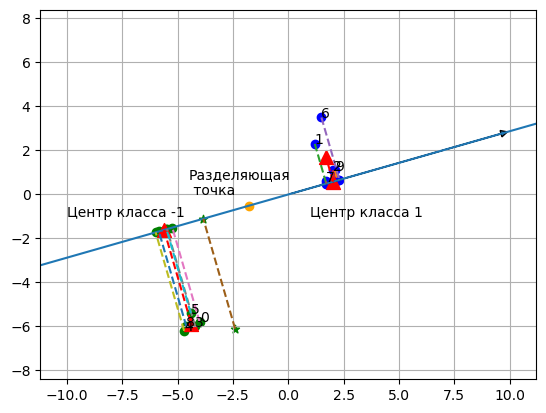

In [7]:
    print("2.3")
 #     Построение графика
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.grid(True, which='both')
    ax.set_ylim(-6*1.4, 6 * 1.4) # сохранение пропорций 
    ax.set_xlim(-8*1.4, 8 * 1.4)
    plt.plot([-w[0]*15, w[0]*15],[-w[1]*15,w[1]*15])
    plt.scatter(X[0],Y[0],c=colors[0])
    plt.scatter(X[1],Y[1],c=colors[1])
    
    projection = [[i*w for i in j] for j in a]

    X_pr = [[i[0] for i in projection[j]] for j in range(2)]
    Y_pr = [[i[1] for i in projection[j]] for j in range(2)]
    plt.scatter(X_pr[0],Y_pr[0],c=colors[0])
    plt.scatter(X_pr[1],Y_pr[1],c=colors[1])
    for i in range(len(X)):
        for j in range(len(X[i])):
            plt.plot([X[i][j],X_pr[i][j]],[Y[i][j],Y_pr[i][j]],linestyle = '--')
    plt.scatter(u1[0], u1[1],marker='^',s=100,c = 'red') 
    
    plt.scatter(better_point_pr[0],better_point_pr[1],c = 'orange')

    a_centr_1 = np.dot(w,u1)
    projection_centr_1 = a_centr_1*w
    plt.scatter(projection_centr_1[0], projection_centr_1[1],marker='^',s=100,c='red') 
    
    plt.scatter(u2[0], u2[1],marker='^',s=100,c = 'red') 
    a_centr_2 = np.dot(w,u2)
    projection_centr_2 = a_centr_2*w
    plt.scatter(projection_centr_2[0], projection_centr_2[1],marker='^',s=100,c='red') 
    plt.plot([projection_centr_1[0],u1[0]],[projection_centr_1[1],u1[1]],linestyle = '--',c='red')
    plt.plot([projection_centr_2[0],u2[0]],[projection_centr_2[1],u2[1]],linestyle = '--',c='red')
    
    
    pr_one_point = a_point*w
    plt.plot([point[0],pr_one_point[0]],[point[1],pr_one_point[1]],linestyle = '--',c='#9c5e17')


    plt.scatter(point[0],point[1],c=colors[result_ind],marker='*')
    plt.scatter(pr_one_point[0],pr_one_point[1],c=colors[result_ind],marker='*')
    
    plt.arrow(0,0,w[0]*10,w[1]*10,head_width=0.3, head_length=0.3)
    text = range(10)
    for i in text:
        plt.annotate(text[i-1], (data[i][0][0],data[i][0][1]) )
    plt.text(-10,-1,"Центр класса -1")
    plt.text(1,-1,"Центр класса 1")
    plt.text(-4.5,0,"Разделяющая\n точка")